### 1. Documentation:

http://seaborn.pydata.org/


Really well with pandas

### 2. Distribution plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips=sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### distplot()

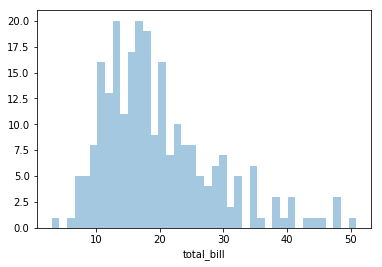

In [5]:
sns.distplot(tips['total_bill'], kde=False,bins=40)

#### a) jointplot()

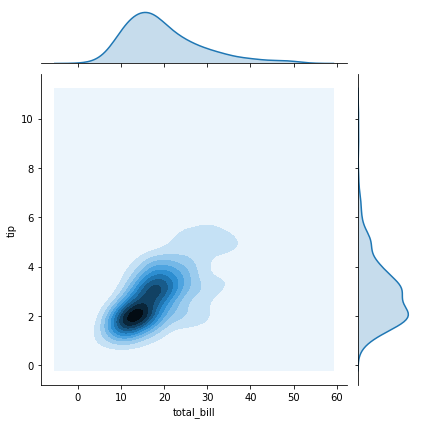

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')
#kind: hex,scatter,reg, kde

#### b) pairplot()

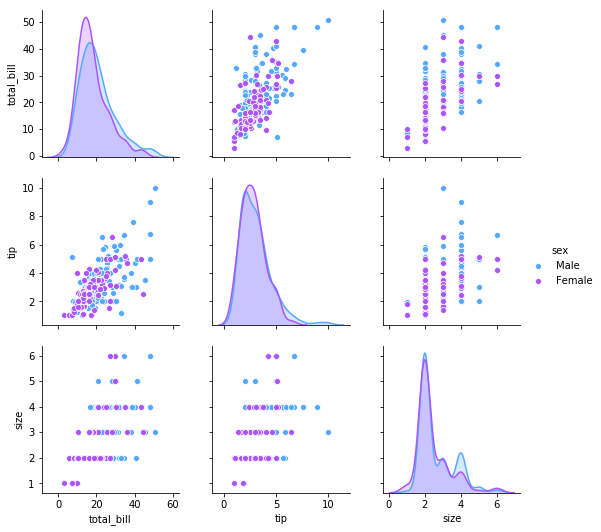

In [7]:
sns.pairplot(tips,hue='sex',palette='cool')

#### c) rugplot()

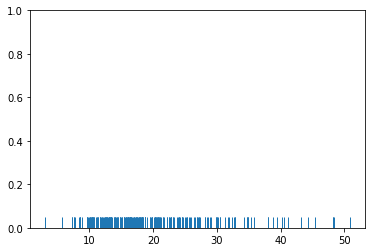

In [8]:
sns.rugplot(tips['total_bill'])

#### d) kdeplot()

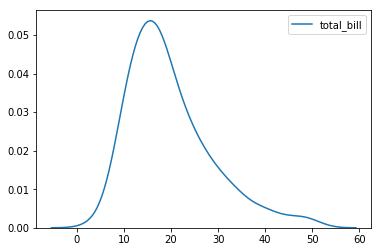

In [9]:
sns.kdeplot(tips['total_bill'])

### 3. Categorical plots

#### a) barplot()

In [17]:
import numpy as np

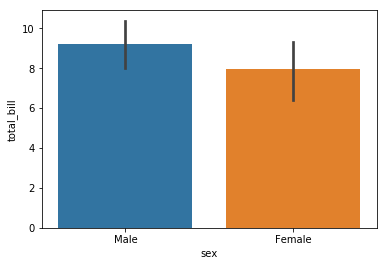

In [19]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

#### b) countplot()

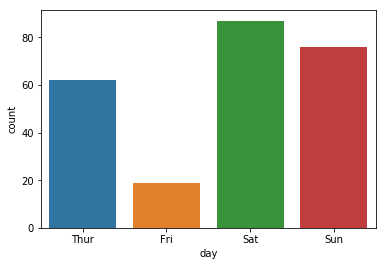

In [21]:
sns.countplot(x='day',data=tips)

#### c) boxplot()

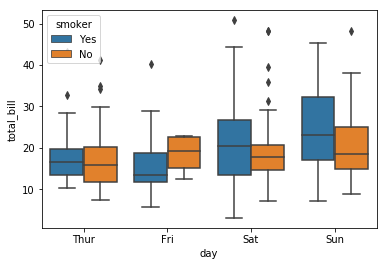

In [26]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

#### d) violinplot()

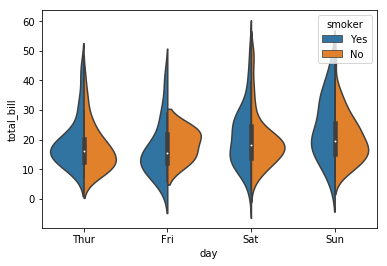

In [30]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True)

#### e) stripplot()

C:\Users\novikovay\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


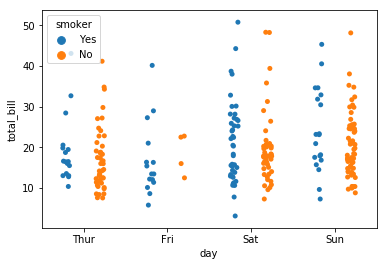

In [33]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='smoker',split=True)

#### f) swarmplot() -- combines strip and violin


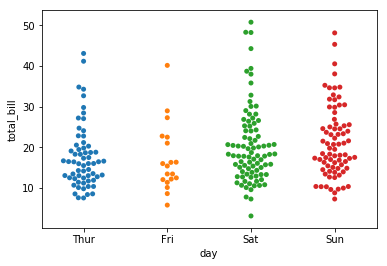

In [35]:
sns.swarmplot(x='day',y='total_bill',data=tips)

#### g) combination of plots

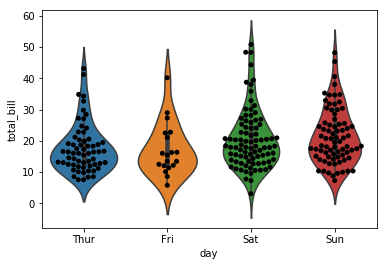

In [36]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

#### h) catplot() --preivously factorplot(), generalization

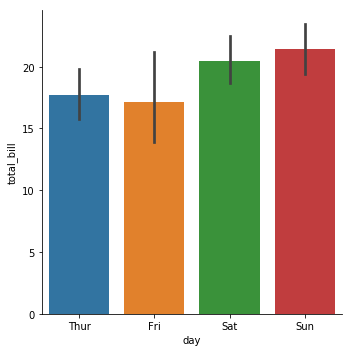

In [44]:
sns.catplot(x='day',y='total_bill',data=tips, kind='bar')

### 4. Matrix plots

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [50]:
tc = tips.corr()

#### a) heatmap()

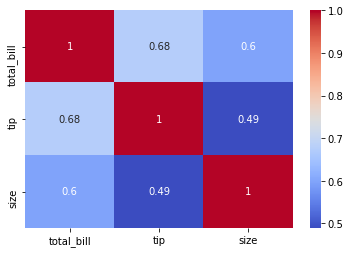

In [53]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [55]:
fc=flights.pivot_table(index='month',columns='year')
fc

passengers                                                       
year            1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                      
January          112  115  145  171  196  204  242  284  315  340  360  417
February         118  126  150  180  196  188  233  277  301  318  342  391
March            132  141  178  193  236  235  267  317  356  362  406  419
April            129  135  163  181  235  227  269  313  348  348  396  461
May              121  125  172  183  229  234  270  318  355  363  420  472
June             135  149  178  218  243  264  315  374  422  435  472  535
July             148  170  199  230  264  302  364  413  465  491  548  622
August           148  170  199  242  272  293  347  405  467  505  559  606
September        136  158  184  209  237  259  312  355  404  404  463  508
October          119  133  162  191  211  229  274  306  347  359  407  461
November         104  114  146  172  180  203  237  271  305  310  362  390
December         118  140  166  194  201  229  278  306  336  337  405  432

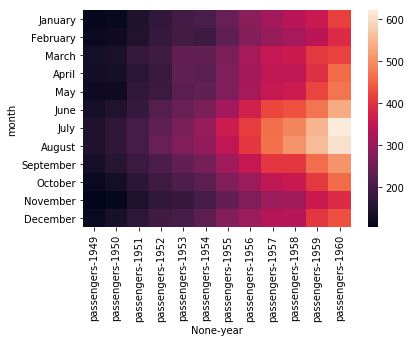

In [56]:
sns.heatmap(fc)

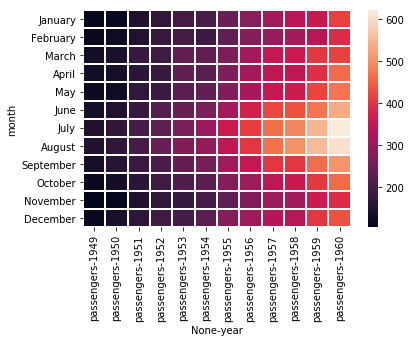

In [57]:
sns.heatmap(fc,linewidth=1,linecolor='white')

#### b) clustermap()

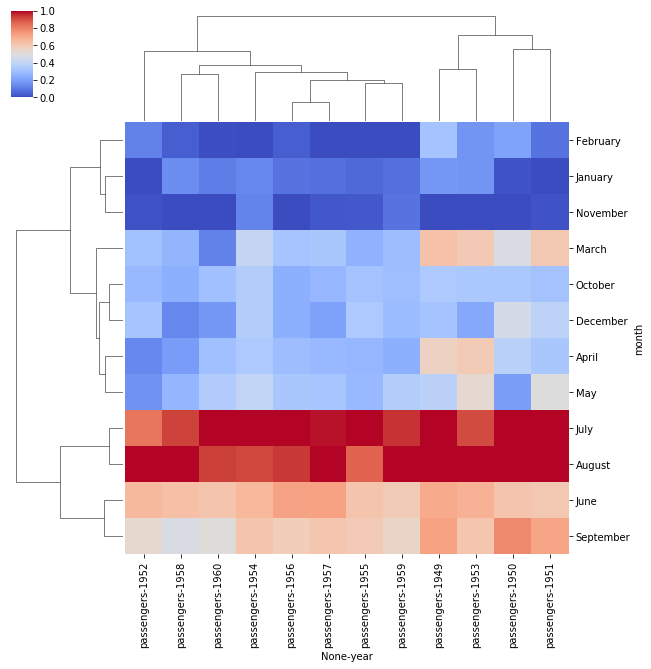

In [60]:
sns.clustermap(fc,cmap='coolwarm',standard_scale=1)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 5. Grids

In [9]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

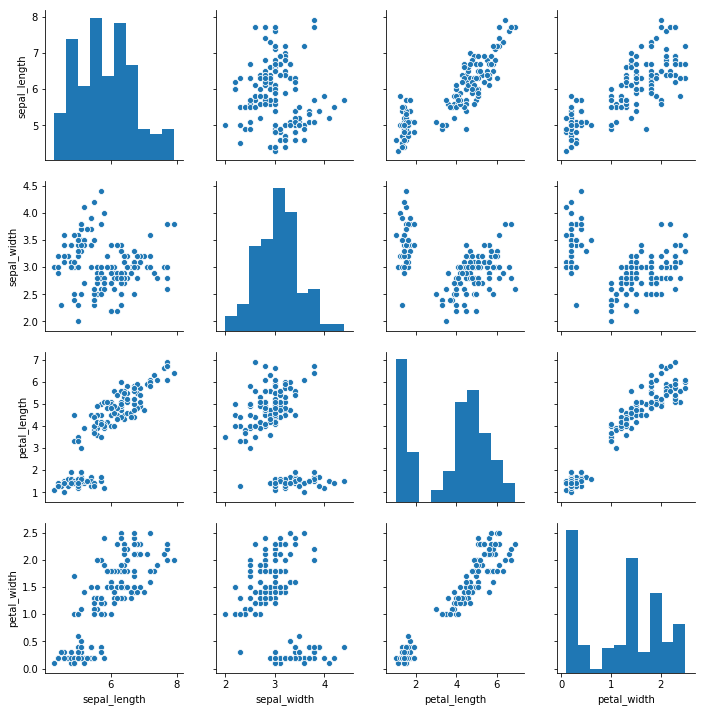

In [11]:
sns.pairplot(iris)

#### PairGrid()

#### Adding more control - pairplot uses historical diagonals + scatters as upper and lower

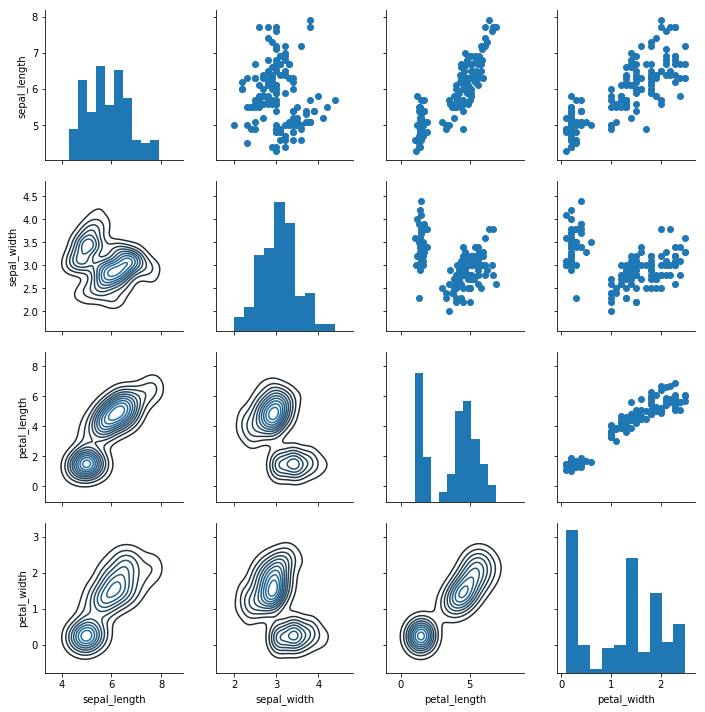

In [19]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

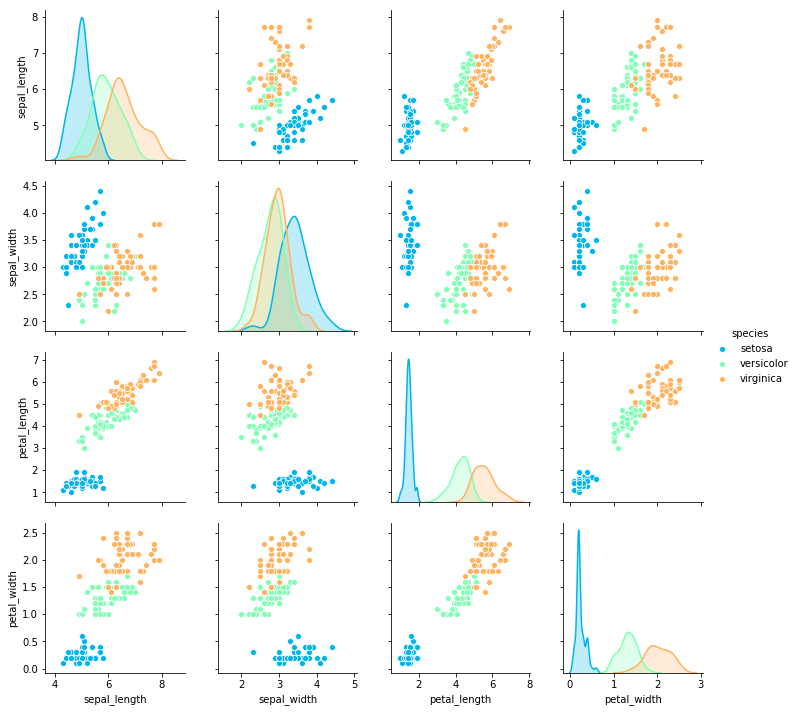

In [20]:
sns.pairplot(iris, hue='species', palette='rainbow')

#### FacetGrid()

In [21]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


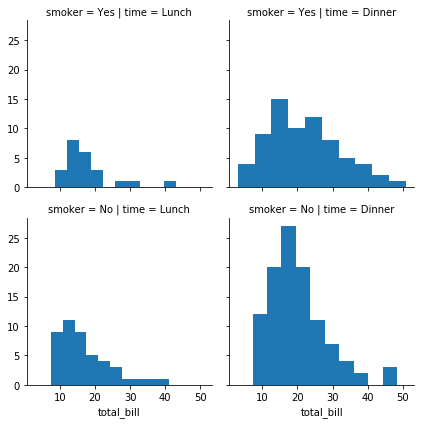

In [23]:
g = sns.FacetGrid(tips, col='time', row='smoker')
g = g.map(plt.hist, "total_bill")

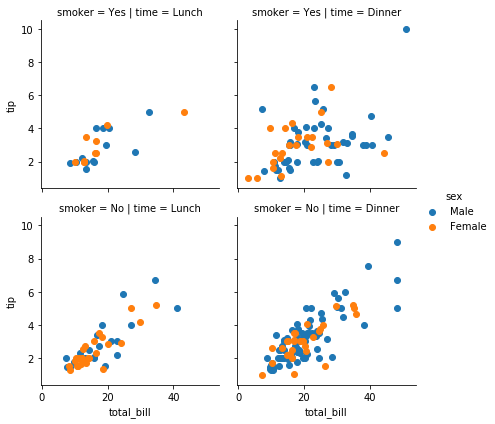

In [25]:
g = sns.FacetGrid(tips, col='time', row='smoker', hue = 'sex')
g = g.map(plt.scatter, "total_bill", 'tip').add_legend()

#### JointGrid

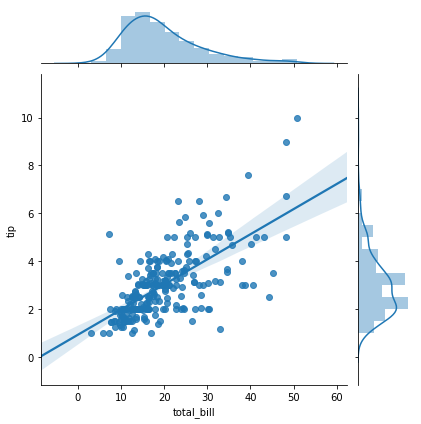

In [28]:

g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

### 6. Regression plots

In [1]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


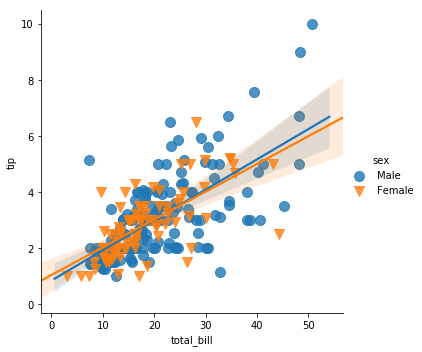

In [6]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100})

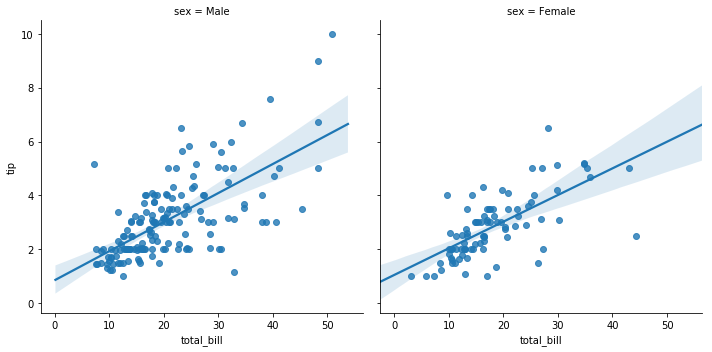

In [7]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

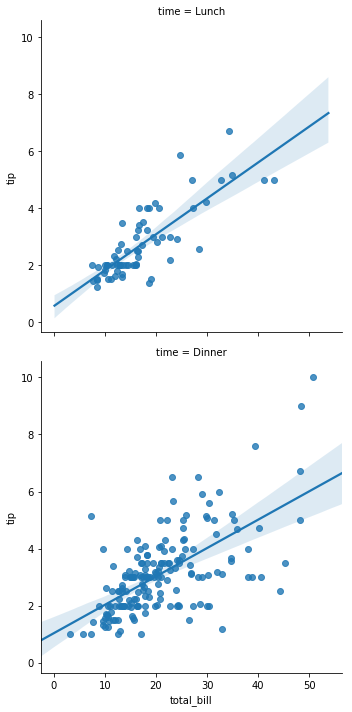

In [8]:
sns.lmplot(x='total_bill',y='tip',data=tips,row='time')

### 7. Style and Color

remove the lines

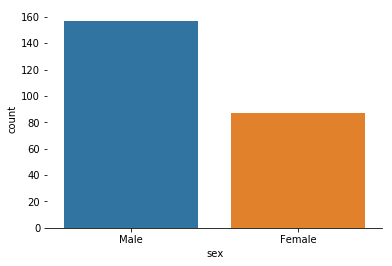

In [10]:
sns.set_style()
sns.countplot(x='sex',data=tips)
#Remove the lines
sns.despine(left=True)

size

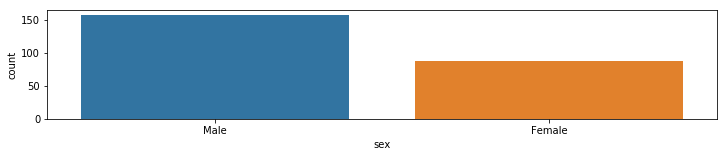

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,2))
sns.countplot(x='sex',data=tips)


size as context

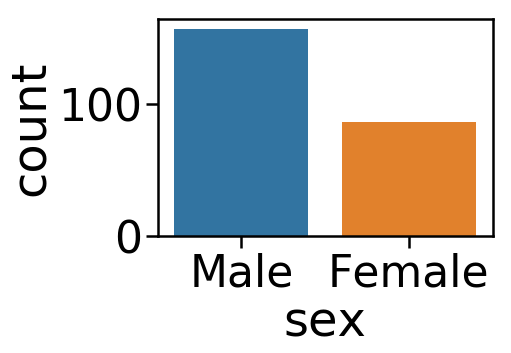

In [16]:
sns.set_context("poster",font_scale=2)
sns.countplot(x='sex',data=tips)

palette

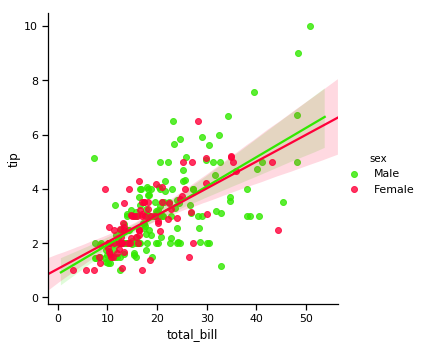

In [24]:
sns.set_context("notebook")
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex',palette='prism')

google matplotlib colormaps!